# Modelos Econométricos
Neste notebook tem os seguintes modelos estatísticos:
- AR
- ARIMA
- SARIMA

## **Prepare Environment**

<br/>


### Imports

In [109]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# autoarima
import pmdarima as pm

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import itertools
import os

<br/>

### Set Config

In [110]:
%matplotlib inline

# Carrega a extensão "autoreload" para que o código possa mudar
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set_context("paper")  # Definindo o contexto para "paper"
sns.set_theme(style='darkgrid',
    palette='deep',
    color_codes=True,
    rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Suprima avisos desnecessários para que a apresentação pareça limpa
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
# plt.style.use('seaborn')  # fivethirtyeight - Removido
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set_theme(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set_theme(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

<br/>

### Load Data

In [113]:
%%time

df_soja = pd.read_csv(r'C:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\db_soja_modificado\db_pré-processado_02.csv',
                              encoding='utf8',
                              delimiter=',',
                              parse_dates=True,
                              index_col=0,
                              verbose=True)

Tokenization took: 15.96 ms
Type conversion took: 10.45 ms
Parser memory cleanup took: 0.00 ms
CPU times: total: 62.5 ms
Wall time: 74.7 ms


In [114]:
df_soja.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2006-04-27,27.15,-1.38,28.06,0.47,-0.17,-0.29,-0.18,-0.11,-0.03
2006-04-28,27.67,-0.77,28.08,0.35,0.52,0.35,0.23,0.34,0.41
2006-04-29,27.65,-0.81,28.11,0.35,-0.02,0.50,0.33,0.21,0.32
2006-04-30,27.63,-0.75,28.14,0.23,-0.02,-0.04,0.48,0.31,0.19
2006-05-01,27.61,-0.88,28.18,0.31,-0.02,-0.04,-0.06,0.46,0.29


---

## **Split Data**

In [ ]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_soja['preco'].iloc[:size_train]
df_test = df_soja['preco'].iloc[size_train:]

In [117]:
# Definir a série temporal
ts = df_soja['preco']

# Dividir os dados em treinamento e teste
size_train = int(len(ts) * 0.8)
df_train, df_test = ts[0:size_train], ts[size_train:len(ts)]
size_test = len(df_test)

print('Observations: %d' % (len(ts)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))

Observations: 6410
Training Observations: 5128
Testing Observations: 1282


In [119]:
df_train.tail()

data
2020-05-06   107.86
2020-05-07   110.64
2020-05-08   111.42
2020-05-09   111.89
2020-05-10   112.37
Name: preco, dtype: float64

Text(0.5, 1.0, 'Tamaho Treinamento = 5128')

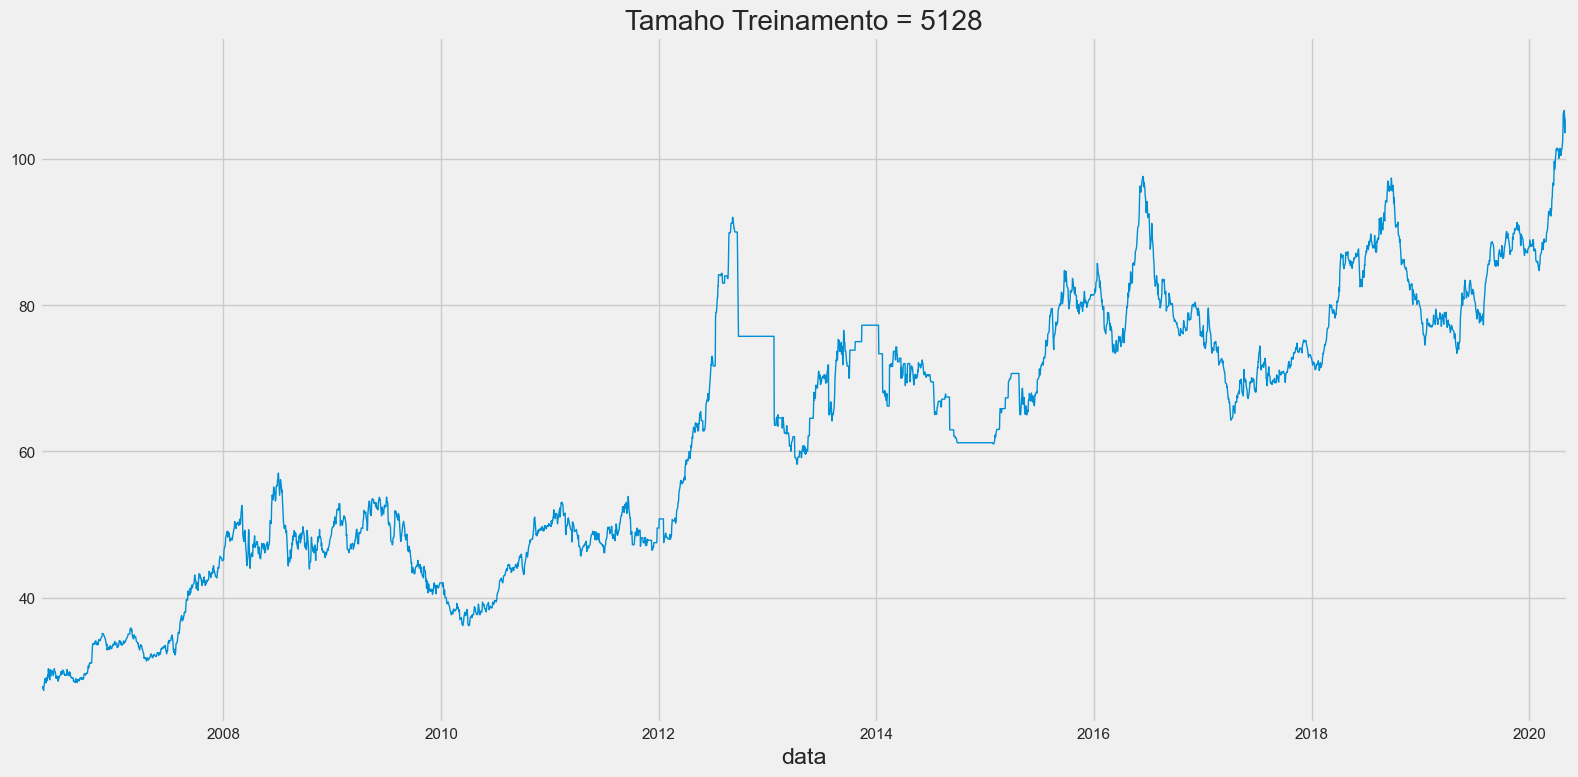

In [120]:
df_train.plot(linewidth=1)
plt.grid(True)
plt.title(f'Tamaho Treinamento = {len(df_train)}')

In [121]:
df_test.head()

data
2020-05-11   112.84
2020-05-12   113.95
2020-05-13   115.27
2020-05-14   116.27
2020-05-15   115.83
Name: preco, dtype: float64

Text(0.5, 1.0, 'Tamaho Teste = 1282')

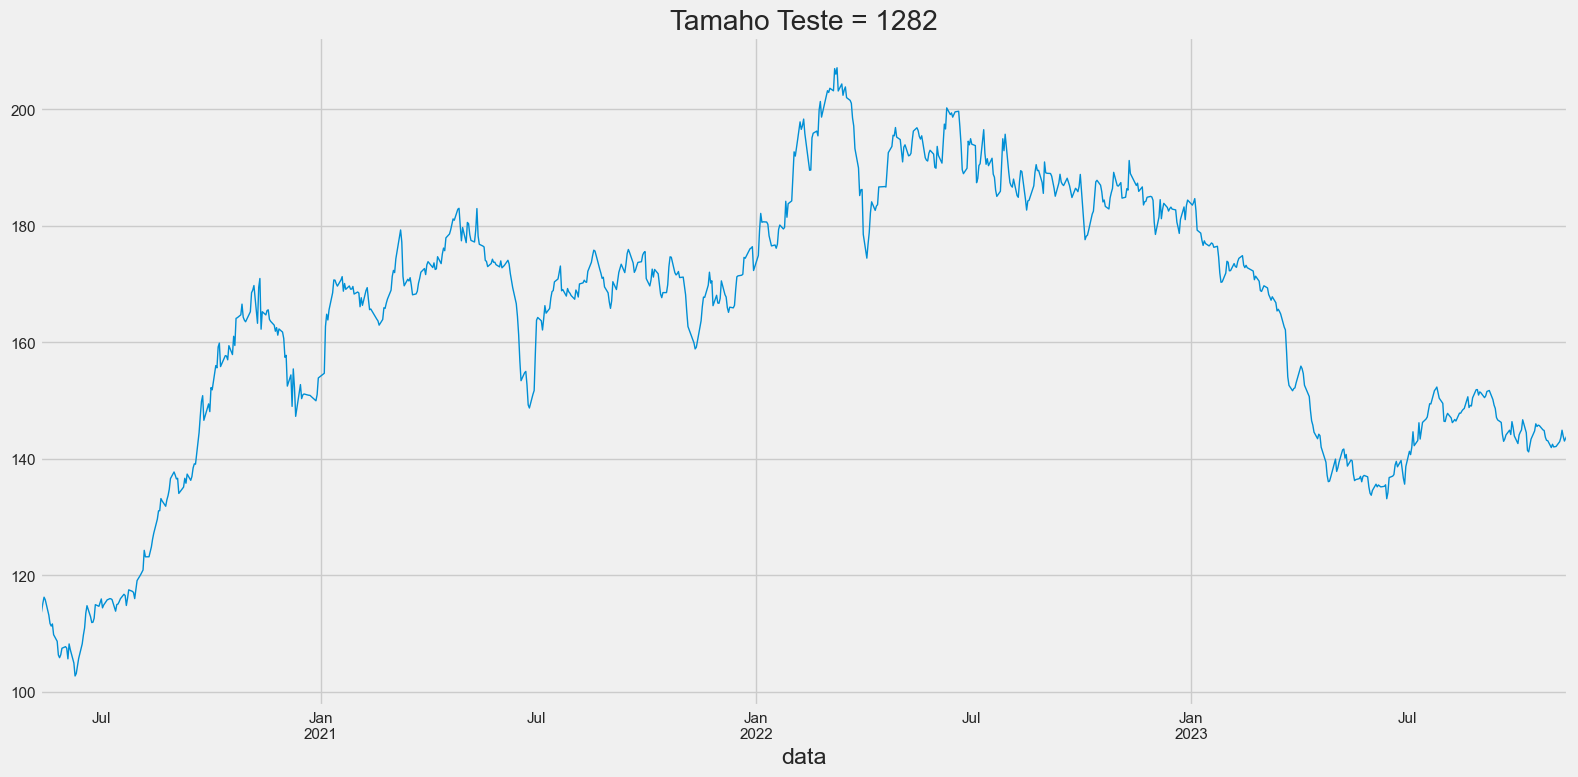

In [122]:
df_test.plot(linewidth=1)
plt.grid(True)
plt.title(f'Tamaho Teste = {len(df_test)}')

### Manipulação do índice

In [123]:
df_train.index

DatetimeIndex(['2006-04-27', '2006-04-28', '2006-04-29', '2006-04-30',
               '2006-05-01', '2006-05-02', '2006-05-03', '2006-05-04',
               '2006-05-05', '2006-05-06',
               ...
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', name='data', length=5128, freq=None)

In [124]:
df_test.index

DatetimeIndex(['2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20',
               ...
               '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07',
               '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
               '2023-11-12', '2023-11-13'],
              dtype='datetime64[ns]', name='data', length=1282, freq=None)

In [125]:
df_train.reset_index(drop=True, inplace=True)
df_train.index

RangeIndex(start=0, stop=5128, step=1)

In [126]:
df_test.reset_index(drop=True, inplace=True)
df_test.index

RangeIndex(start=0, stop=1282, step=1)

In [127]:
df_train.index = pd.RangeIndex(start=0, stop=len(df_train), step=1)
df_train.index

RangeIndex(start=0, stop=5128, step=1)

In [128]:
df_test.index = pd.RangeIndex(start=len(df_train), stop=len(df_train) + len(df_test), step=1)
df_test.index

RangeIndex(start=5128, stop=6410, step=1)

---

## **Avaliação**

In [129]:
dict_results = {}

<br/>

### Exibir resultados

In [130]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    #mape = mean_absolute_percentage_error(df_test, y_forecast)
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

<br/>

### Busca dos Melhores Parâmetros

#### Grid Search

In [131]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0, 3)

# Generate all different combinations of p, q and q triplets
list_pdq = list(itertools.product(p, d, q))
print(f'All different combinations of p, q and q:\n {list_pdq}')

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(f'\n\nAll different combinations of seasonal p, q and q:\n {seasonal_pdq}')

All different combinations of p, q and q:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


All different combinations of seasonal p, q and q:
 [(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [132]:
def search_best_params_arima_model(df_train: 'Dataframe', pdq: list) -> list:
    best_model = 99999
    best_params = (0, 0, 0)
    param = ()
    
    for param in pdq:
        try:
            arima_model = ARIMA(df_train, order=param)
            results = arima_model.fit()
            print(f'pdq = {param} | AIC = {results.aic}')
            
            if results.aic < best_model:
                best_model = results.aic
                best_params = param
        except: 
            continue
    
    print(f'best ARIMA: {best_params} | AIC:{best_model}')
    return [best_params, best_model]

In [133]:
def search_best_params_sarima_model(df_train, trend, pdq):  
    best_model = 99999
    best_param_seasonal = ()
    param = ()
    param_seasonal = ()
    
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = SARIMAX(df_train,
                                   order=pdq,
                                   seasonal_order=param_seasonal,
                                   trend=trend,          
                                   enforce_stationarity=True,
                                   enforce_invertibility=False)
            results = sarima_model.fit()
            print(f'pdq = {pdq} | param_seasonal = {param_seasonal} | AIC = {results.aic}')

            if results.aic < best_model:
                best_model = results.aic
                best_param_seasonal = param_seasonal
        except: 
            continue
    
    print(f'\n\nBest SARIMA: {pdq}x{param_seasonal}12 | AIC:{best_model}')
    return [best_param_seasonal, best_model]

---

## **Modeling**

<br/>

### **Build Model**

#### **Modelos Estatísticos**

#### **AR**

In [134]:
# Calcule o número de defasagens como a raiz quadrada do número de observações em df_train
lags = int(np.sqrt(len(df_train)))

In [141]:
ar_model = AutoReg(df_train,
                   lags=lags,
                   trend='n',
                   seasonal=False,
                   period=len(df_test))
ar_fit = ar_model.fit()

In [142]:
# forecast
y_ar_forecast = ar_fit.predict(start=(df_test.index[0]), end=df_test.index[-1])

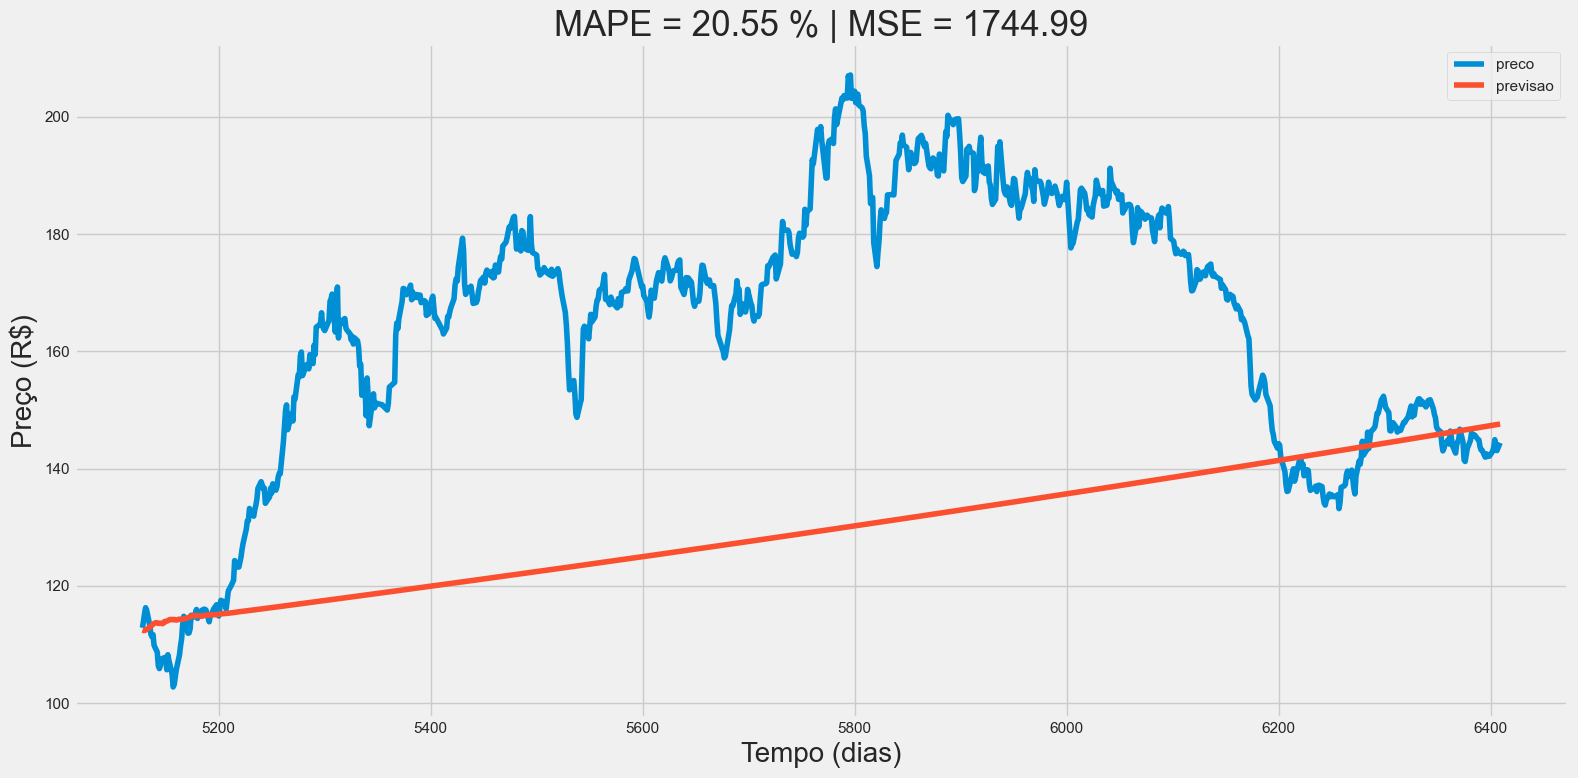

In [143]:
show_result_model(df_train=df_train,
                  df_test=df_test, 
                  y_forecast=y_ar_forecast,
                  model_name='ar_model')

<br/>

#### **ARIMA**

#### Librarie: `pmdarima`
- Tips: https://alkaline-ml.com/pmdarima/tips_and_tricks.html

In [152]:
%%time

list_order_arima = search_best_params_arima_model(df_train=df_train,
                                                  pdq=list_pdq)
print(list_order_arima)

best ARIMA: (0, 0, 0) | AIC:99999
[(0, 0, 0), 99999]
CPU times: total: 0 ns
Wall time: 0 ns


In [153]:
%%time

autoarima_model = pm.auto_arima(df_train,
                                stepwise=True,
                                suppress_warnings=True,
                                error_action="ignore",
                                information_criterion='aic',
                                start_p=2,
                                start_d=1,
                                start_q=2,
                                lags=lags,
                                seasonal=False,
                                trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8234.621, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8357.619, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8244.092, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8257.192, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8360.361, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8232.717, Time=1.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8232.502, Time=1.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8232.586, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8232.611, Time=1.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8234.652, Time=1.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8233.827, Time=0.48 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 10.547 seconds
CPU times: total: 9.95 s
Wall time: 10.6 s


In [154]:
print(autoarima_model.order)
print(autoarima_model.aic())

(0, 1, 2)
8232.50161206872


In [155]:
# fit
autoarima_model_fit = autoarima_model.fit(y=df_train)
autoarima_model_fit

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

Os resultados mostram que a melhor combinação de parâmetros para o modelo ARIMA é (0, 1, 2), que corresponde a um modelo de média móvel integrada de ordem 2 (IMA(1, 2)). O AIC para este modelo é 8232.502, que é significativamente menor do que o AIC para o modelo ARIMA ajustado com a função search_best_params_arima_model. Isso sugere que o modelo IMA(1, 2) fornece um melhor ajuste aos dados.

In [156]:
# forecast
y_forecast = autoarima_model_fit.predict(n_periods=size_test)
len(y_forecast)

1282

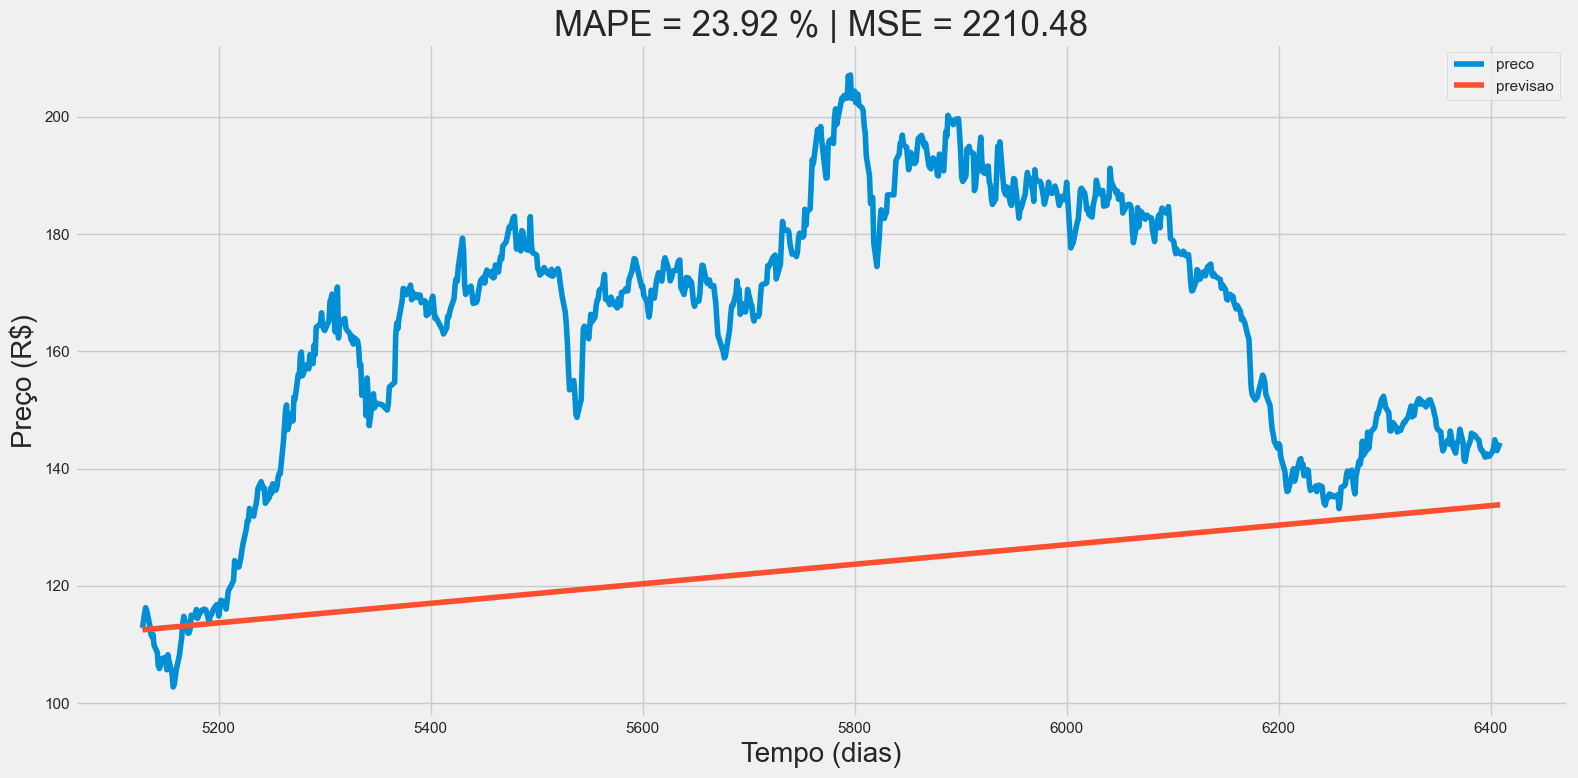

In [157]:
show_result_model(df_train=df_train,
                  df_test=df_test,
                  y_forecast=y_forecast,
                  model_name='arima_model')

O MAPE é uma medida de precisão que compara as previsões do modelo com os valores reais. Ele é calculado como a média dos erros percentuais absolutos, onde o erro percentual absoluto é a diferença absoluta entre a previsão e o valor real, dividido pelo valor real. Um MAPE menor indica que as previsões do modelo estão mais próximas dos valores reais.

O MSE é uma medida de erro que compara as previsões do modelo com os valores reais. Ele é calculado como a média dos erros quadrados, onde o erro quadrado é a diferença entre a previsão e o valor real ao quadrado. Um MSE menor indica que as previsões do modelo estão mais próximas dos valores reais.

Portanto, ao avaliar um modelo de previsão, você geralmente deseja minimizar tanto o MAPE quanto o MSE.

<br/>

#### **SARIMA**

In [159]:
%%time

list_order_seasonal_aic = search_best_params_sarima_model(df_train=df_train,
                                                          trend='t',
                                                          pdq=(2, 1, 2))
print(list_order_seasonal_aic)

pdq = (2, 1, 2) | param_seasonal = (0, 0, 0, 12) | AIC = 8234.53383303128
pdq = (2, 1, 2) | param_seasonal = (0, 0, 1, 12) | AIC = 8236.557729597496
pdq = (2, 1, 2) | param_seasonal = (0, 0, 2, 12) | AIC = 8237.506740083776
pdq = (2, 1, 2) | param_seasonal = (0, 1, 0, 12) | AIC = 11756.952845014059
pdq = (2, 1, 2) | param_seasonal = (0, 1, 1, 12) | AIC = 9610.146020479173
pdq = (2, 1, 2) | param_seasonal = (0, 1, 2, 12) | AIC = 9461.556318678566
pdq = (2, 1, 2) | param_seasonal = (0, 2, 0, 12) | AIC = 17357.29132719946
pdq = (2, 1, 2) | param_seasonal = (0, 2, 1, 12) | AIC = 15506.527831187072
pdq = (2, 1, 2) | param_seasonal = (0, 2, 2, 12) | AIC = 13556.618176296812
pdq = (2, 1, 2) | param_seasonal = (1, 0, 0, 12) | AIC = 8237.215484204462
pdq = (2, 1, 2) | param_seasonal = (1, 0, 1, 12) | AIC = 8238.576215066778
pdq = (2, 1, 2) | param_seasonal = (1, 0, 2, 12) | AIC = 8240.378529372934
pdq = (2, 1, 2) | param_seasonal = (1, 1, 0, 12) | AIC = 10445.85197298371
pdq = (2, 1, 2) | param

In [160]:
list_order_seasonal_aic

[(0, 0, 0, 12), 8234.53383303128]

In [161]:
sarima_model = SARIMAX(df_train,
                       order=(2, 1, 2),
                       seasonal_order=list_order_seasonal_aic[0],
                       trend='c',          
                       enforce_stationarity=False,
                       enforce_invertibility=False)

In [162]:
# fit
sarima_fit = sarima_model.fit()
print(sarima_fit)

In [163]:
# forecast
y_forecast_sarima = sarima_fit.predict(start=df_test.index[0], end=df_test.index[-1]).to_numpy()
len(y_forecast_sarima)

1282

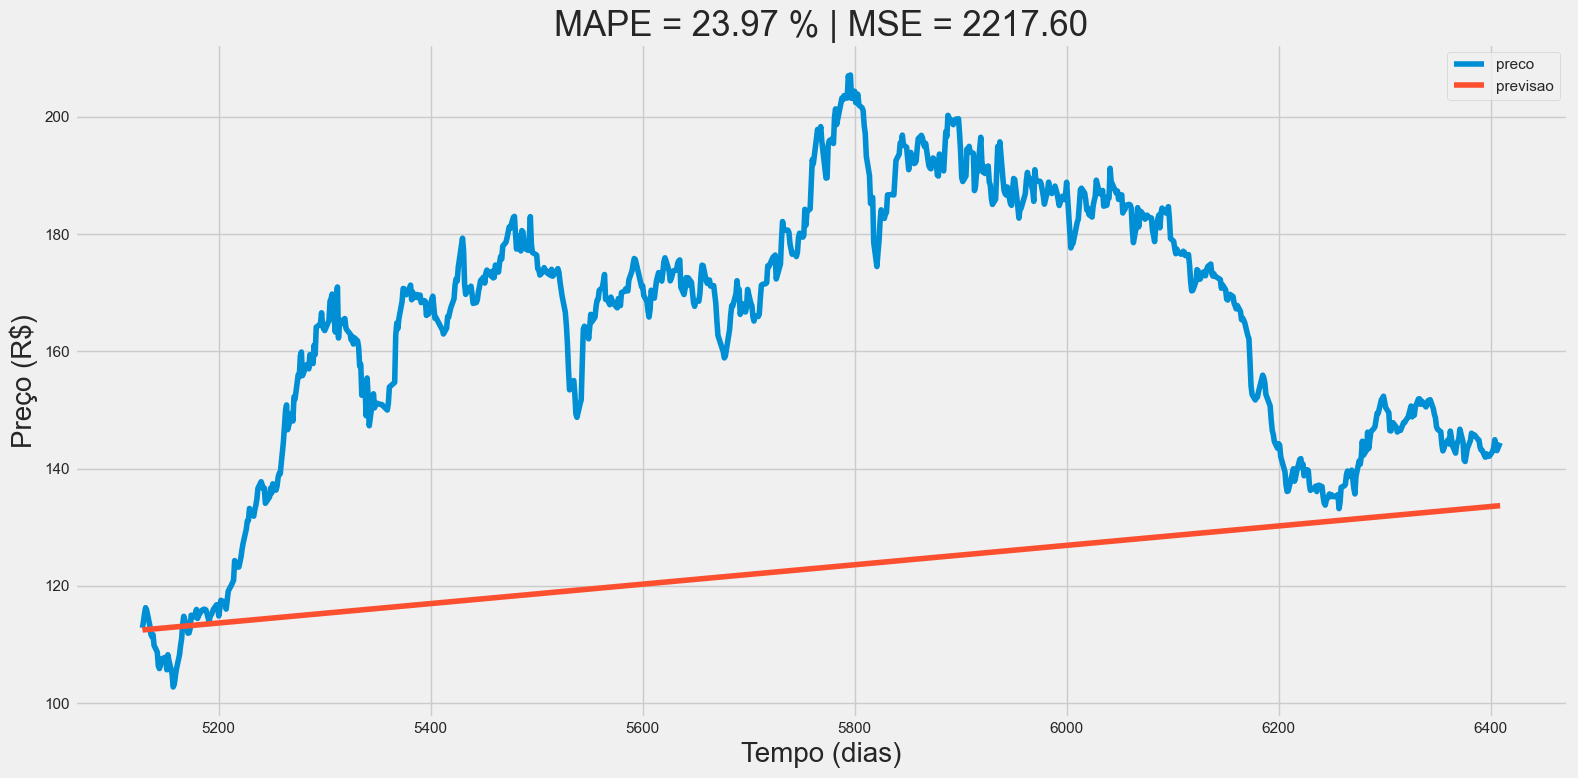

In [164]:
show_result_model(df_train=df_test,
                  df_test=df_test,
                  y_forecast=y_forecast_sarima,
                  model_name='sarima_model')

---

## **Results**

In [165]:
dict_results

{'ar_model': [20.546661581139656, 1744.9871274864377],
 'arima_model': [23.916700313661547, 2210.4820923589277],
 'sarima_model': [23.968900043905453, 2217.6017361695463]}

O modelo AR tem um MAPE de 20.55 e um MSE de 1744.99. Isso significa que, em média, as previsões do modelo AR estão 20.55% longe dos valores reais, e o quadrado da diferença entre as previsões e os valores reais é 1744.99.

O modelo ARIMA tem um MAPE de 23.92 e um MSE de 2210.48. Isso significa que, em média, as previsões do modelo ARIMA estão 23.92% longe dos valores reais, e o quadrado da diferença entre as previsões e os valores reais é 2210.48.

O modelo SARIMA tem um MAPE de 23.97 e um MSE de 2217.60. Isso significa que, em média, as previsões do modelo SARIMA estão 23.97% longe dos valores reais, e o quadrado da diferença entre as previsões e os valores reais é 2217.60.

---